In [35]:
from __future__ import annotations
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
from scipy import integrate
rk45 = integrate.solve_ivp

In [9]:
# Parameters
class CompetitiveLV:
    def __init__(self, parameters: dict):
        self.r  = parameters['r']  # array of intrinsic growth rates
        self.K  = parameters['K']  # array of carrying capacities
        self.a  = parameters['a']  # array of alpha values (limiting effect of one species on another)
        self.t  = np.arange(0, len(self.r))
        
    def dN_dt(self, N: np.array, t: float = 0) -> np.array:
        """ 
        Calculates the growth rates for all species

        """
        
        dN = np.zeros((len(N), ))
        for i in self.t:
            dN[i] = self.r[i] * N[i] * (1 - ((N[i] + np.sum(self.a[i] * N)) / self.K[i]))
        return dN            
        
    
    def solve(self, ode: Callable, N0: np.array, t: np.array):
        sol = ode(self.dN_dt, N0, t)
        if sol.shape[1] == 2:
            self.plot2D(sol, t)
        else:
            self.plot3D(sol, t)
        return sol
        
    def plot2D(self, 
               sol:    np.array, 
               t:      np.array, 
               labels: List[str] = ["Species 1", "Species 2"],
               title:  str       = "Populations Over Time"):
        
        plt.plot(t, sol[:, 0], label = labels[0])
        plt.plot(t, sol[:, 1], label = labels[1])
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Population Size")
        plt.show()
        
    def plot3D(self,
               sol:    np.array,
               t:      np.array,
               labels: List[str] = ["Species 1", "Species 2", "Species 3"],
               title:  str       = "Populations Over Time"):
        return

In [54]:
def Euler(f: Callable, X0: np.array, t: np.array):
    h = (t[-1] + t[0]) / len(t)
    X = np.zeros((len(t), len(X0)))
    X[0] = X0
    for i in range(len(t) - 1):
        X[i + 1] = X[i] + h * f(X[i], t[i])
    return X

def Trapezoidal(f: Callable, X0: np.array, t: np.array):
    h = (t[-1] + t[0]) / len(t)
    X = np.zeros((len(t), len(X0)))
    X[0] = X0

    for i in range(len(t) - 1):
        k1 = f(X[i], t[i])
        k2 = f(X[i] + h * k1, t[i] + h)
        X[i + 1] = X[i] + (h / 2) * (k1 + k2)
        
    return X

def Midpoint(f: Callable, X0: np.array, t: np.array):
    h = (t[-1] + t[0]) / len(t)
    X = np.zeros((len(t), len(X0)))
    X[0] = X0

    for i in range(len(t) - 1):
        k = f(X[i] + (h / 2) * f(X[i], t[i]), t[i] + (h / 2))
        X[i + 1] = X[i] + h * k

    return X

In [73]:
parameters = {
    'r': np.array( [0.4, 0.1] ),
    'K': np.array( [100, 100] ),
    'a': np.array( [[0, 1.1],
                    [0.9, 0]])
}

LV = CompetitiveLV(parameters)

ode = integrate.odeint

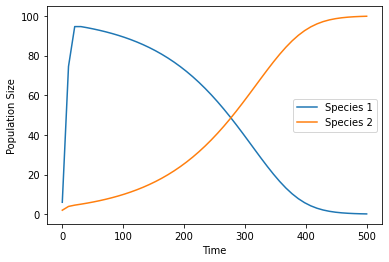

In [74]:
h = 10
T = 500
t  = np.linspace(0, T, int(T / h))
N0 = np.array([6, 2])
sol = LV.solve(ode, N0, t)

In [9]:
sol

array([[ 6.        ,  5.        ],
       [ 6.16037283,  5.13708244],
       [ 6.32440793,  5.27749765],
       ...,
       [ 0.46593401, 99.53406601],
       [ 0.46315692, 99.53684311],
       [ 0.4603963 , 99.53960372]])